# 서울지하철데이터 python으로 분석하기

- Tmoney 대중교통 통계자료 > 2022년 6월 교통카드 데이터 > 지하철 유무임별 이용현황
- 무임승차비율이 가장 높은 지하철역
- 이용객 10만명 이상, 유임승차비율이 최대인 지하철역
- 승차인원이 10,000명 이상인 곳에서 유임승차비율이 50%이하인 지하철역

In [1]:
import csv
import platform
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc


# font settings
mpl.rcParams['axes.unicode_minus']=False
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차', '작업일시']
유임승차비율 최대, 이용객 10만명 이상인 곳 관악산(서울대)역 95.6%
유임승차비율 50% 이하, 승차인원 10,000명 이상인 곳 관악산(서울대)역 34.1%


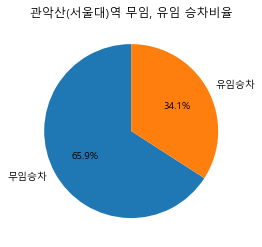

In [ ]:
f = open('../data/seoul_subway/seoul_subway.csv', mode='r', encoding='utf-8')
data = csv.reader(f)
header = next(data)
print(header)

paid_rate = 0
not_paid_rate = 0
max_rate = 0
lowest_paid_rate = 1000

for row in data:
	for c in range(4, 8):
		row[c] = int(row[c])

	station = row[3]
	paid = row[4]
	not_paid = row[6]
	승차인원 = row[4] + row[6]
	승하차인원 = sum(row[4:])
	paid_rate = round((paid * 100) / 승차인원, 1)
	not_paid_rate = 100 - paid_rate

	# 무임승차비율 최대 지하철역
	# if row[6] != 0:
	# 	if not_paid_rate > max_rate:
	# 		max_rate = not_paid_rate

	# 이용객 10만명 이상, 유임승차비율 최대 지하철역
	if (승하차인원 >= 100000) and (paid_rate > max_rate):
		max_rate = paid_rate

	# 유임승차비율 50% 이하, 승차인원 10,000명 이상
	if (paid_rate <= 50) and (승차인원 >= 10000):
		if paid_rate < lowest_paid_rate:
			lowest_paid_rate = paid_rate
			station = row[3]

print(f'유임승차비율 최대, 이용객 10만명 이상인 곳 {station}역 {max_rate}%')
print(f'유임승차비율 50% 이하, 승차인원 10,000명 이상인 곳 {station}역 {lowest_paid_rate}%')
f.close()


# font by os
system_name = platform.system()
if system_name == 'Windows':  # Windows 운영체제
	print('Windows OS')
	plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':  # Mac OS
	print('Mac OS')
	plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':  # Linux
	print('Linux OS')
	path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
	font_name = fm.FontProperties(fname=path, size=12)
	plt.rc('font', family=font_name)


# 유임승차비율이 가장 낮은 역의 비율을 파이 차트로 표시
plt.title(station + '역 무임, 유임 승차비율')
plt.pie([(100-lowest_paid_rate), lowest_paid_rate],\
	labels=['무임승차', '유임승차'],\
		autopct='%.1f%%',\
			startangle=90)
plt.show()

- 승하차인원이 가장 많은 지하철역
  - 유임승차, 무임승차, 유임하차, 무임하차 4가지 경우 존재
  - 각각의 컬럼별 최대 인원을 찾아 해당 값의 인덱스 격인 지하철역을 찾는다

In [ ]:
import csv

max = 0
station_line = ''

with open('../data/seoul_subway/seoul_subway.csv', mode='r', encoding='utf-8') as f:
	divide = next(csv.reader(f))
	divide = divide[4:]
	for i, d in zip(range(4, 8), divide):
		for line in f.readlines():
			line_one = line.split(',')
			value = int(line_one[i])
			if value > max: 
				max = value
				station_line = line_one[1]
		print(f'{d} 최대 승하차역 {station_line} {max:,}명')

- 새벽 4시 지하철 이용인원
- 출근시간대(7~9시) 지하철 이용현황

In [ ]:
import csv
import matplotlib.pyplot as plt


with open('../data/seoul_subway/seoul_subway_time.csv', encoding='utf-8-sig') as f:
	data = csv.reader(f)
	
	# 헤더 정보 2줄 컬럼에 담기
	column = []
	column.append(next(data))
	column.append(next(data))

	# 출근시간대(7~9) 인덱스
	am7 = column[0].index('07:00:00~07:59:59')
	am8 = column[0].index('08:00:00~08:59:59')
	am9 = column[0].index('09:00:00~09:59:59')

	result = [[], []]
	people_4am = 0
	max_num = [0, 0]
	max_station = ['', '']

	for row in data:
		row[4:] = map(int, row[4:])

		# 새벽4시 지하철 이용객
		people_4am += row[4]
		result[0].append(row[4])
		if (row[4] > max_num[0]):
			max_num[0] = row[4]
			max_station[0] = row[3]

		# 출근시간대 지하철 이용현황
		row_sum = sum(row[am7:am9:2])
		result[1].append(row_sum)
		if (row_sum > max_num[1]):
			max_num[1] = row_sum
			max_station[1] = row[3] + '(' + row[1] + ')'

print(f'새벽 4시 승차인원: {people_4am:,}')
print(f'승차인원 최대 지하철역: {max_station[0]}역 {max_num[0]:,}명')

# data visualization
result_sort = sorted(result[0])
plt.figure(dpi=100)
plt.bar(range(len(result_sort)), result_sort)
plt.show()